In [2]:
import networkx as nx
import sys
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [3]:
# data_file = 'router'
# G = nx.read_adjlist(data_file)
# G.remove_edges_from(G.selfloop_edges())
# for node in nx.nodes(G):
#     if G.degree(node) == 0:
#         G.remove_node(node)

data_file = 'CEnew' # 'HepPh'
G = nx.read_adjlist(data_file)
G.remove_edges_from(nx.selfloop_edges(G))
nodes = list(nx.nodes(G))
for node in nodes:
    if G.degree(node) == 0:
        G.remove_node(node)

In [4]:
print(nx.number_of_nodes(G), nx.number_of_edges(G))

453 2025


In [5]:
max_ = 0.03
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)
degreerank = degree(G, max_topk)
print('done!')
degreerank_non = degree_non(G, max_topk)
print('done!')

# vote = voterank(G, max_topk)
# print('done!')
# vote_non = voterank_non(G, max_topk)
# print('done!')

newmethod_rank = EnRenewRank(G, max_topk, 2)
print('done!')

kshell_rank = kshell(G, max_topk)
print('done!')
kshell_rank_non = kshell_non(G, max_topk)
print('done!')

14
done!
done!
done!
done!
done!


## SIR Time

In [6]:
infect_prob = compute_probability(G) * 1.5
avg = 100
max_iter = 200000
atio = 1.5
cover_prob = infect_prob / atio
topk = max_topk


degreerank_result = get_sir_result(G, degreerank, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
print('done!')
degreerank_non_result = get_sir_result(G, degreerank_non, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
print('done!')
# voterank_result = get_sir_result(G, vote, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
# print('done!')
# voterank_non_result = get_sir_result(G, vote_non, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
# print('done!')
newmethod_result = get_sir_result(G, newmethod_rank, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
print('done!')
kshell_result = get_sir_result(G, kshell_rank, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
print('done!')
kshell_non_result = get_sir_result(G, kshell_rank_non, topk, avg, infect_prob, cover_prob, max_iter) / nx.number_of_nodes(G)
print('done!')

done!
done!
done!
done!
done!


In [7]:
max_len = max([len(degreerank_result),
                len(degreerank_non_result),
                # len(voterank_result),
                # len(voterank_non_result),
                len(newmethod_result),
                #len(newmethod_non_result),
                len(kshell_result),
                len(kshell_non_result)])

In [8]:
degreerank_array = np.ones(max_len) * degreerank_result[-1]
degreerank_non_array = np.ones(max_len) * degreerank_non_result[-1]
# voterank_array = np.ones(max_len) * voterank_result[-1]
# voterank_non_array = np.ones(max_len) * voterank_non_result[-1]
newmethod_array = np.ones(max_len) * newmethod_result[-1]
kshell_array = np.ones(max_len) * kshell_result[-1]
kshell_non_array = np.ones(max_len) * kshell_non_result[-1]

degreerank_array[:len(degreerank_result)] = degreerank_result
degreerank_non_array[:len(degreerank_non_result)] = degreerank_non_result
# voterank_array[:len(voterank_result)] = voterank_result
# voterank_non_array[:len(voterank_non_result)] = voterank_non_result
newmethod_array[:len(newmethod_result)] = newmethod_result
kshell_array[:len(kshell_result)] = kshell_result
kshell_non_array[:len(kshell_non_result)] = kshell_non_result

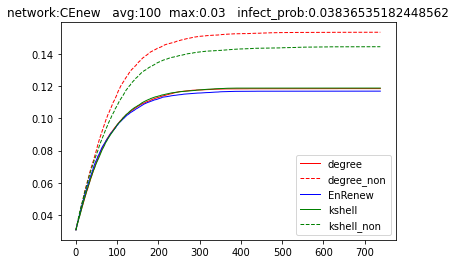

In [10]:
%matplotlib inline
plt.title('network:{}   avg:{}  max:{}   infect_prob:{}'.format(data_file, avg, max_, infect_prob))
plt.plot(np.array(range(max_len)), degreerank_array, 'r-', label='degree', linewidth=1.0, )
plt.plot(np.array(range(max_len)), degreerank_non_array, 'r--', label='degree_non', linewidth=1.0, )
# plt.plot(np.array(range(max_len)), voterank_array, 'y-', label='vote', linewidth=1.0, )
# plt.plot(np.array(range(max_len)), voterank_non_array, 'y--', label='vote_non', linewidth=1.0, )
plt.plot(np.array(range(max_len)), newmethod_array, 'b-', label='EnRenew', linewidth=1.0, )
plt.plot(np.array(range(max_len)), kshell_array, 'g-', label='kshell', linewidth=1.0, )
plt.plot(np.array(range(max_len)), kshell_non_array, 'g--', label='kshell_non', linewidth=1.0, )
plt.legend()
plt.show()